<h1>Please Do Not Run this Code </h1>

In [1]:
from faker import Faker
import pandas as pd
import numpy as np

In [2]:
fake = Faker()
num_samples = 1000
np.random.seed(42)  # For reproducibility

In [3]:
data = {
    'Student ID': [i for i in range(num_samples)],
    'Name': [fake.name() for _ in range(num_samples)],
    'Gender': [fake.random_element(elements=("Male", "Female")) for _ in range(num_samples)],
}

In [12]:
# Generate Parental Support (categorical)
data['Parental Support'] = [
    fake.random_element(elements=("High", "Medium", "Low"))
    for _ in range(num_samples)
]

# Generate Previous Grade (based on parental support and some randomness)
data['Previous Grade'] = [
    np.clip(np.random.normal(loc=85 
        if ps == 'High' else 75 if ps == 'Medium' else 50, scale=5), 0, 99)
    for ps in data['Parental Support']
]

# Generate Study Hours Per Week (dependent on parental support and previous grade)
data['Study Hours Per Week'] = [
    np.clip(np.random.normal(loc=25 if ps == 'High' else 18 if ps == 'Medium' else 12, scale=5), 0, 36)
    for ps in data['Parental Support']
]

# Generate Attendance Rate (influenced by parental support and extracurricular activities)
data['Extracurricular Activities'] = [fake.random_int(min=0, max=5) for _ in range(num_samples)]
data['Attendance Rate'] = [
    np.clip(np.random.normal(loc=80 if ps == 'High' else 70 if ps == 'Medium' else 55, scale=10) - 2*act, 50, 100)
    for ps, act in zip(data['Parental Support'], data['Extracurricular Activities'])
]

# Generate Final Grade (based on all the above factors)
final_grades = []
for i in range(num_samples):
    # Base final grade influenced by previous grade
    base_grade = data['Previous Grade'][i] * 0.4
    
    # Study hours influence
    study_hours_influence = data['Study Hours Per Week'][i] * 1.2
    
    # Attendance influence
    attendance_influence = data['Attendance Rate'][i] * 0.3
    
    # Extracurricular influence (small positive or negative effect depending on how it balances study)
    extracurricular_influence = -data['Extracurricular Activities'][i] * 0.5 + 5
    
    # Parental support influence
    parental_support_influence = {
        'High': 10,
        'Medium': 5,
        'Low': 0
    }[data['Parental Support'][i]]
    
    # Random noise
    noise = np.random.normal(0, 5)
    
    # Final grade calculation
    final_grade = (base_grade + study_hours_influence + attendance_influence + 
                   extracurricular_influence + parental_support_influence + noise)
    
    # Clip final grade to realistic range [0, 100]
    final_grade = np.clip(final_grade, 0, 99)
    
    final_grades.append(final_grade)

# Add Final Grades to the dataset
data['Final Grade'] = final_grades

# Convert to DataFrame
df = pd.DataFrame(data)

# Display the first few rows
print(df.head())

   Student ID              Name  Gender Parental Support  Previous Grade  \
0           0      Destiny Reid  Female             High       84.834874   
1           1      Mark Johnson    Male             High       82.481749   
2           2  Robert Rodriguez    Male             High       84.138125   
3           3       Frank Smith    Male              Low       53.573659   
4           4      Megan Miller    Male           Medium       81.389283   

   Study Hours Per Week  Extracurricular Activities  Attendance Rate  \
0             28.827011                           1        71.215053   
1             30.367064                           4        68.945005   
2             27.493450                           2        70.026189   
3              2.287512                           2        52.104180   
4             17.222888                           2        77.971785   

   Final Grade  
0    98.499980  
1    99.000000  
2    99.000000  
3    47.581656  
4    91.037102  


<h2>Please change the file name in case if you run it</h2>
<p>Original file name is 'data.csv'</p>

In [10]:
filename = 'hello'
df.to_csv(f'../data/{filename}.csv',index = False)

In [6]:
import matplotlib.pyplot as plt

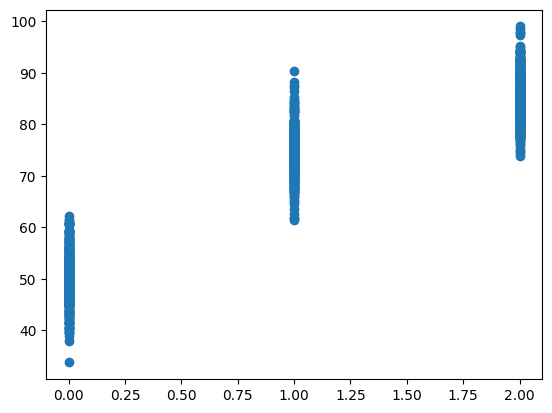

In [7]:
final = data['Final Grade']
previous = data['Previous Grade']
support = [
    0 if data['Parental Support'][i]== 'Low'
    else 1 if data['Parental Support'][i] == 'Medium'
    else 2
    for i in range(num_samples)]
plt.scatter(support,previous)

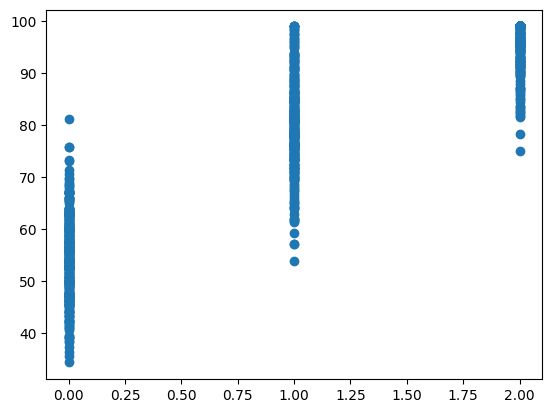

In [8]:
plt.scatter(support,final)